### Importing Dependencies 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
import cv2

plt.rcParams['figure.figsize'] = [20, 10]

### Locating Keypoints 

In [2]:
image = cv2.imread('images/face.jpeg')

In [3]:
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
training_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'Original Image Grayscaled')

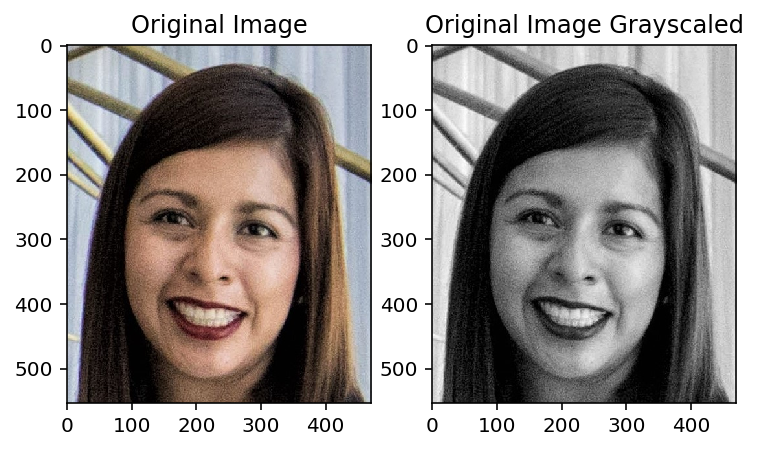

In [6]:
plt.subplot(121)
plt.imshow(training_image)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(training_gray, cmap="gray")
plt.title("Original Image Grayscaled")

In [7]:
import copy
orb = cv2.ORB_create(200, 2.0)

In [8]:
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

In [9]:
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

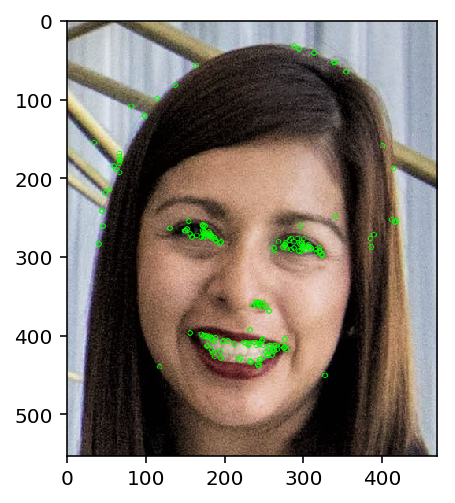

In [11]:
plt.imshow(cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color=(0,255,0)))

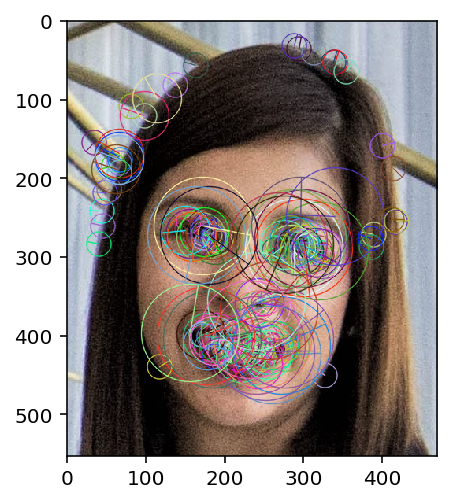

In [12]:
plt.imshow(cv2.drawKeypoints(training_image, keypoints, keyp_with_size, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

Text(0.5, 1.0, 'Keypoints without size or orientation')

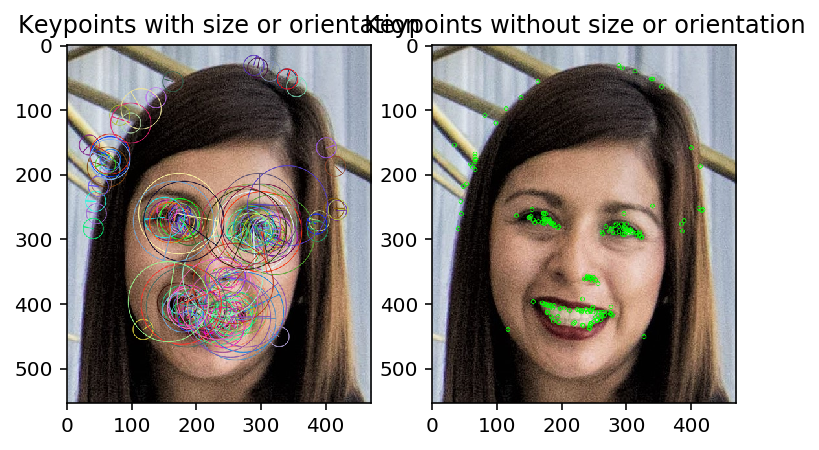

In [14]:
plt.subplot(121)
plt.imshow(keyp_with_size)
plt.title('Keypoints with size or orientation')

plt.subplot(122)
plt.imshow(keyp_without_size)
plt.title('Keypoints without size or orientation')

In [15]:
print(f"Number of keypoints: {len(keypoints)}")

Number of keypoints: 175


###  Feature Matching

In [20]:
image1 = cv2.imread('images/face.jpeg')
image2 = cv2.imread('images/face.jpeg')

training_image = cv2.cvtColor(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), cv2.COLOR_RGB2GRAY)

query_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

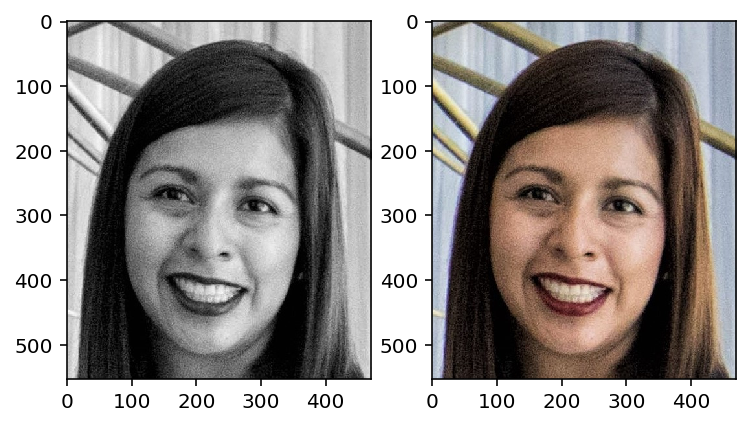

In [22]:
plt.subplot(121)
plt.imshow(training_image, cmap="gray", interpolation="nearest")
plt.subplot(122)
plt.imshow(query_image)

In [24]:
orb = cv2.ORB_create(1000, 2.0)

keypoints_train, descriptors_train = orb.detectAndCompute(training_image, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_image, None)

In [26]:
print(f"Number of training keypoints: {len(keypoints_train)}")
print(f"Number of query keypoints: {len(keypoints_query)}")

Number of training keypoints: 819
Number of query keypoints: 821


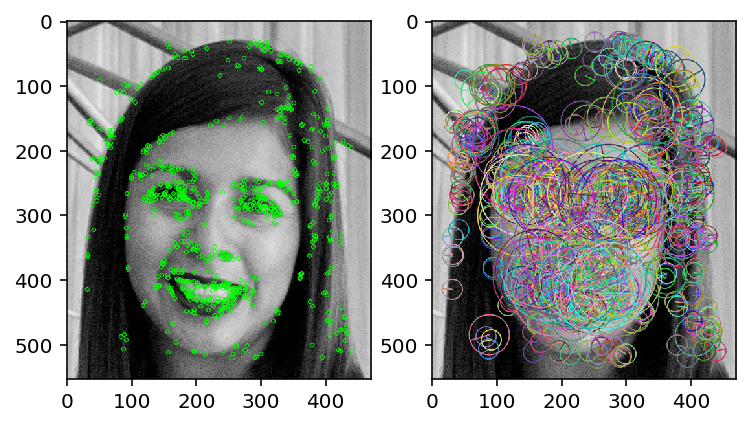

In [40]:
plt.subplot(121)
plt.imshow(cv2.drawKeypoints(training_image, keypoints_train, training_image, color=(0,255,0)))
plt.subplot(122)
plt.imshow(cv2.drawKeypoints(query_image, keypoints_train, query_image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

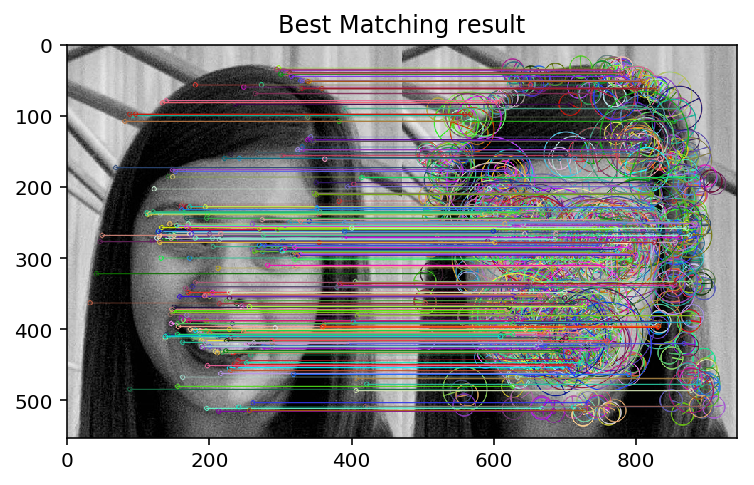

In [39]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_train, descriptors_query)
matches = sorted(matches, key=lambda x:x.distance)
result = cv2.drawMatches(training_gray, keypoints_train, query_image, keypoints_query, matches[:300], query_image, flags=2)
plt.title("Best Matching result")
plt.imshow(result)

### Oriented Fast and Rotated Brief Main Properties

* `Scale Invariance`

* `Rotational Invariance`

* `Illumination Invariance`

* `Noise Invariance`

#### Scale Invariance 

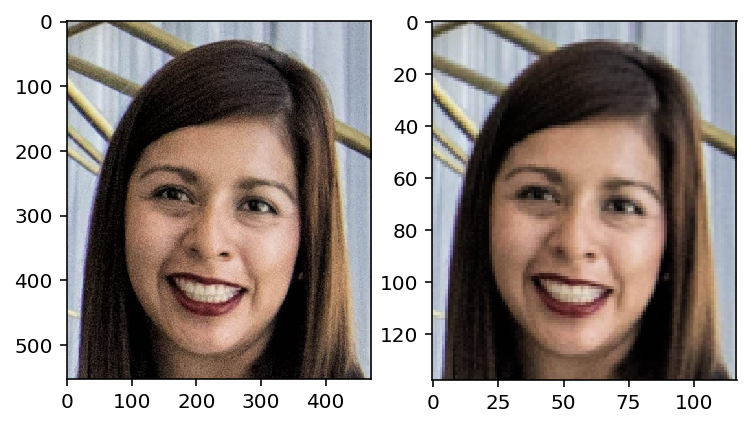

In [55]:
training_image = cv2.cvtColor(cv2.imread('images/face.jpeg'), cv2.COLOR_BGR2RGB)
query_image = cv2.cvtColor(cv2.imread('images/faceQS.png'), cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(training_image)
plt.subplot(122)
plt.imshow(query_image)

Shape of Training Image (553, 471)
Shape of Training Image (138, 117)
Training keypoints: 821
Training keypoints: 65
58


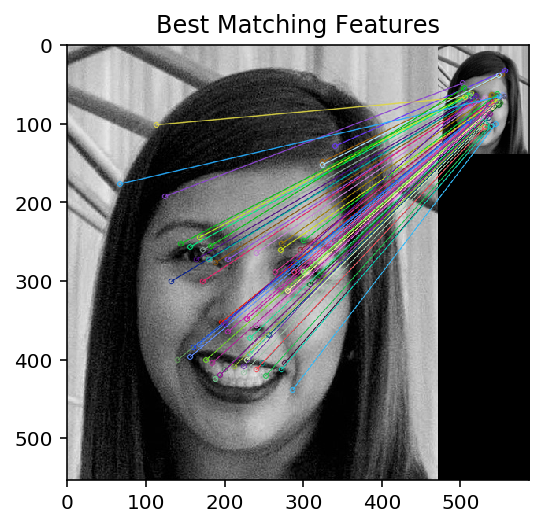

In [64]:
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(1000, 2.0)
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_train, descriptors_query)
matches = sorted(matches, key=lambda x: x.distance)
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:100], query_gray, flags=2)
plt.title("Best Matching Features")
plt.imshow(result)
print(f"Shape of Training Image {training_gray.shape}")
print(f"Shape of Training Image {query_gray.shape}")
print(f"Training keypoints: {len(keypoints_train)}")
print(f"Training keypoints: {len(keypoints_query)}")
print(len(matches))

#### Rotational Invariance 

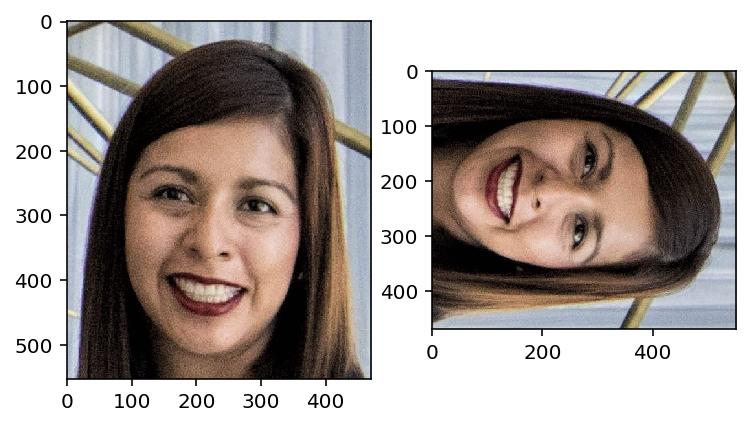

In [66]:
training_image = cv2.cvtColor(cv2.imread('images/face.jpeg'), cv2.COLOR_BGR2RGB)
query_image = cv2.cvtColor(cv2.imread('images/faceR.jpeg'), cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(training_image)
plt.subplot(122)
plt.imshow(query_image)

Shape of Training Image (553, 471)
Shape of Training Image (470, 553)
Training keypoints: 821
Training keypoints: 832
617


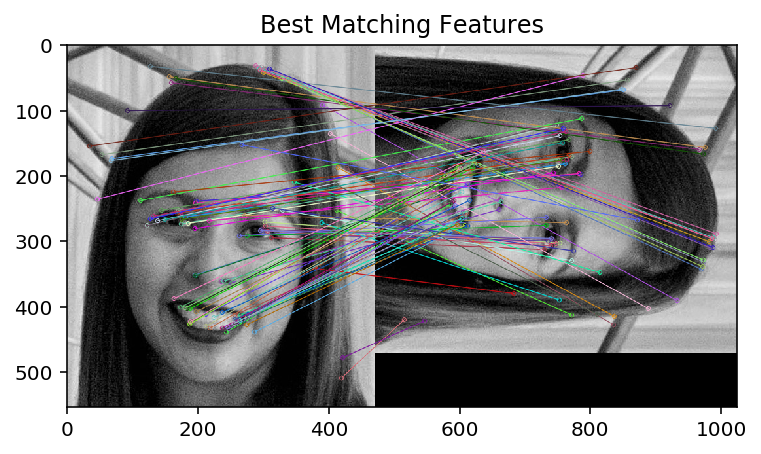

In [67]:
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(1000, 2.0)
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_train, descriptors_query)
matches = sorted(matches, key=lambda x: x.distance)
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:100], query_gray, flags=2)
plt.title("Best Matching Features")
plt.imshow(result)
print(f"Shape of Training Image {training_gray.shape}")
print(f"Shape of Training Image {query_gray.shape}")
print(f"Training keypoints: {len(keypoints_train)}")
print(f"Training keypoints: {len(keypoints_query)}")
print(len(matches))

#### Illumnation Invariance 

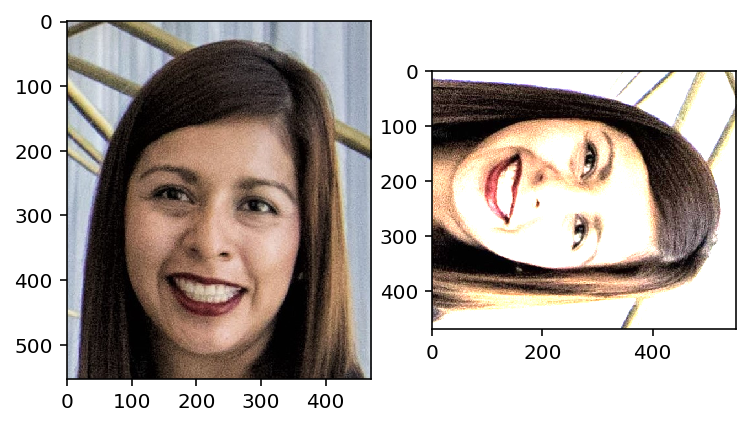

In [68]:
training_image = cv2.cvtColor(cv2.imread('images/face.jpeg'), cv2.COLOR_BGR2RGB)
query_image = cv2.cvtColor(cv2.imread('images/faceRI.png'), cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(training_image)
plt.subplot(122)
plt.imshow(query_image)

Shape of Training Image (553, 471)
Shape of Training Image (470, 553)
Training keypoints: 821
Training keypoints: 846
391


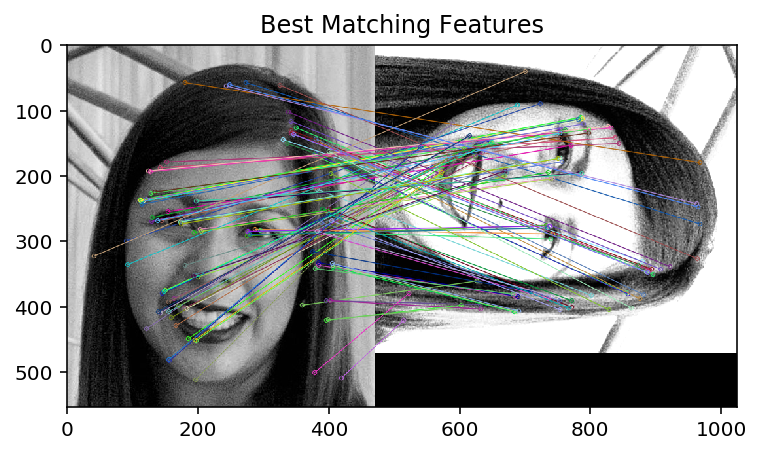

In [69]:
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(1000, 2.0)
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_train, descriptors_query)
matches = sorted(matches, key=lambda x: x.distance)
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:100], query_gray, flags=2)
plt.title("Best Matching Features")
plt.imshow(result)
print(f"Shape of Training Image {training_gray.shape}")
print(f"Shape of Training Image {query_gray.shape}")
print(f"Training keypoints: {len(keypoints_train)}")
print(f"Training keypoints: {len(keypoints_query)}")
print(len(matches))

#### Noise Invariance 

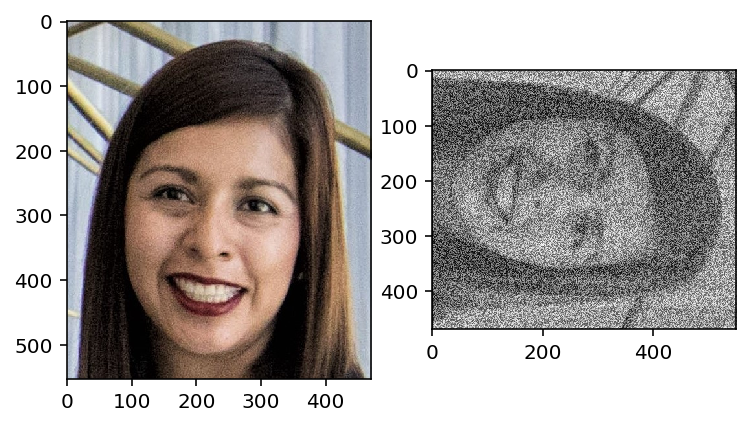

In [70]:
training_image = cv2.cvtColor(cv2.imread('images/face.jpeg'), cv2.COLOR_BGR2RGB)
query_image = cv2.cvtColor(cv2.imread('images/faceRN5.png'), cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(training_image)
plt.subplot(122)
plt.imshow(query_image)

Shape of Training Image (553, 471)
Shape of Training Image (470, 552)
Training keypoints: 821
Training keypoints: 878
207


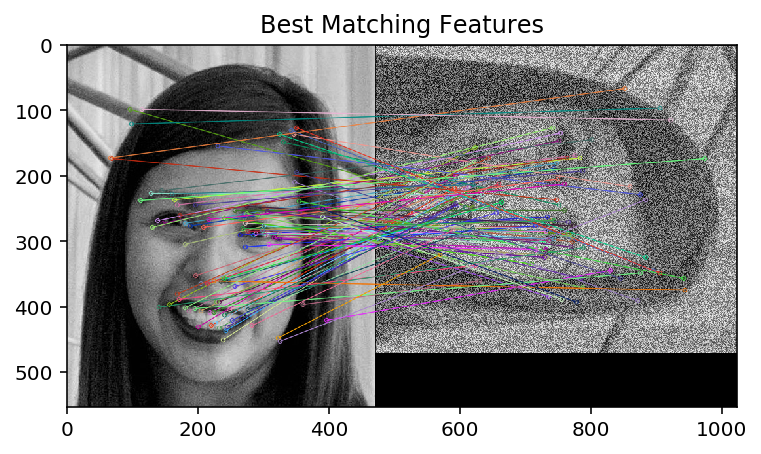

In [71]:
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(1000, 2.0)
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_train, descriptors_query)
matches = sorted(matches, key=lambda x: x.distance)
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:100], query_gray, flags=2)
plt.title("Best Matching Features")
plt.imshow(result)
print(f"Shape of Training Image {training_gray.shape}")
print(f"Shape of Training Image {query_gray.shape}")
print(f"Training keypoints: {len(keypoints_train)}")
print(f"Training keypoints: {len(keypoints_query)}")
print(len(matches))